# Logistic Regression Model

## Load the dataset

In [1]:
import pandas as pd
import ast

# Load training data
train_data = pd.read_csv('train_data.csv')
X_train_raw = train_data['X_train'].tolist()
y_train_raw = train_data['y_train'].tolist()

# Load test data
test_data = pd.read_csv('test_data.csv')
X_test_raw = test_data['X_test'].tolist()
y_test_raw = test_data['y_test'].tolist()

In [2]:
#Make it a list
X_train_raw = [ast.literal_eval(item) if isinstance(item, str) else item for item in X_train_raw]
X_test_raw = [ast.literal_eval(item) if isinstance(item, str) else item for item in X_test_raw]

# Convert the train and test data into strings for the CountVectorizer.
train_str = []
test_str = []

for text in X_train_raw:
    train_str.append(' '.join(text))
    
for text in X_test_raw:
    test_str.append(' '.join(text))

Utilize the Bag of Words (BoW) technique with CountVectorizer, create the feature set limiting to the top 1000 words.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer, limiting max_features to the top 1000 words.
vectorizer = CountVectorizer(max_features=1000) 

# Fit the vectorizer on train and test data. Transform the data into BoW matrices.
train_bow = vectorizer.fit_transform(train_str).toarray()
test_bow = vectorizer.transform(test_str).toarray()

# Train the data using Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=500)

# Fit the model on the training data
model.fit(train_bow, y_train_raw)

# Make predictions
y_pred = model.predict(test_bow)

# Display the classification report for the Logistic Regression Model

In [5]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test_raw, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91     24249
           1       0.85      0.92      0.88     28191
           2       0.80      0.76      0.78      6980
           3       0.87      0.82      0.85     11449
           4       0.84      0.79      0.81      9532
           5       0.75      0.72      0.73      2961

    accuracy                           0.87     83362
   macro avg       0.84      0.82      0.83     83362
weighted avg       0.87      0.87      0.87     83362



# Confusion Matrix from the Logistic Regression model.

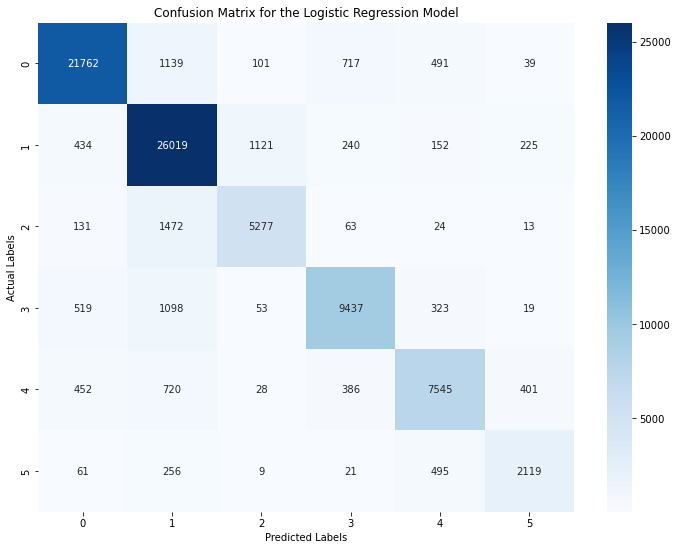

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test_raw, y_pred)

x_labels = range(6)
y_labels = range(6)
plt.figure(figsize=(12, 9))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=x_labels, yticklabels=y_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for the Logistic Regression Model')
plt.show()


# Display the Precision-Recall Curve

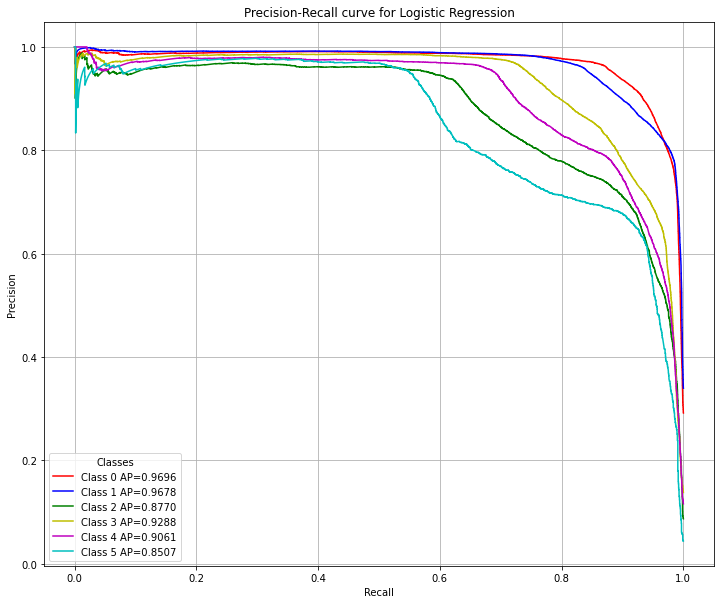

In [7]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Predict probabilities for the test data.
y_probs = model.predict_proba(test_bow)

# Initialize plot colors and figure size.
plot_colors = ['r', 'b', 'g', 'y', 'm', 'c', 'k']
plt.figure(figsize=(12, 10))

# Calculate and plot precision-recall curve for each class.
for i in range(len(model.classes_)):

    # Calculate precision, recall, and average precision.
    precision, recall, _ = precision_recall_curve((y_test_raw == model.classes_[i]), y_probs[:, i])
    avg_precision = average_precision_score((y_test_raw == model.classes_[i]), y_probs[:, i])
    
    # Plot the curve for the current class.
    current_color = plot_colors[i % len(plot_colors)]
    current_label = f'Class {model.classes_[i]} AP={avg_precision:.4f}'
    plt.plot(recall, precision, color=current_color, label=current_label)

# Plot the curves.
plt.title('Precision-Recall curve for Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(title="Classes", loc='best')
plt.grid(True)
plt.show()


# Plotting Training Loss for the model.

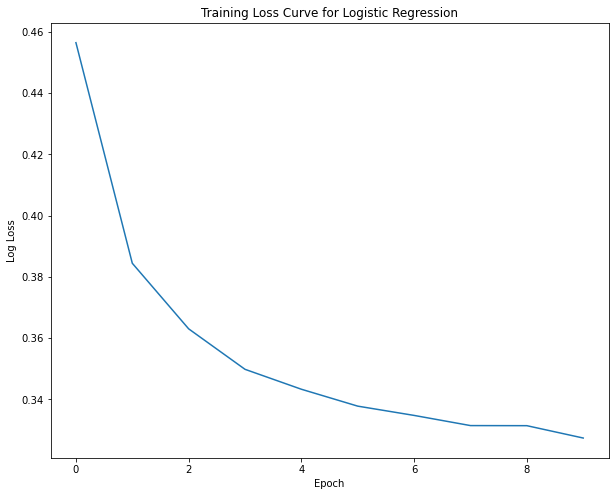

In [8]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# Store the training data. 
X_train = train_bow
y_train = y_train_raw

# Implement SGDClassifier.
# loss = 'log' to specify logistic regression.
model = SGDClassifier(loss='log', learning_rate='constant', eta0=0.01, max_iter=1, warm_start=True, penalty=None)
losses = []

# Train the model for 10 epochs.
for _ in range(10):  
    model.partial_fit(X_train, y_train, classes=np.unique(y_train))
    
    # Calculate and store the loss.
    probabilities = model.predict_proba(X_train)
    
    loss = log_loss(y_train, probabilities)
    losses.append(loss)

# Plot the loss curve.
plt.figure(figsize=(10, 8))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Training Loss Curve for Logistic Regression')
plt.show()


# Hyperparameter Tuning

Results when testing for different C values, Penalties, and Solvers (Keeping max_iter = 500 constant).

Using liblinear solver.

C = 0.001, penalty = l1, solver = 'liblinear' => Accuracy = 0.3432
C = 0.001, penalty = l2, solver = 'liblinear' => Accuracy = 0.6587

C = 0.01, penalty = l1, solver = 'liblinear' => Accuracy = 0.8634
C = 0.01, penalty = l2, solver = 'liblinear' => Accuracy = 0.8603

C = 0.1, penalty = l1, solver = 'liblinear' => Accuracy = 0.8661
C = 0.1, penalty = l2, solver = 'liblinear' => Accuracy = 0.8641

C = 1, penalty = l1, solver = 'liblinear' => Accuracy = 0.8673
C = 1, penalty = l2, solver = 'liblinear' => Accuracy = 0.8666

C = 10, penalty = l1, solver = 'liblinear' => Accuracy = 0.8673
C = 10, penalty = l2, solver = 'liblinear' => Accuracy = 0.8673

C = 100, penalty = l1, solver = 'liblinear' => Accuracy = 0.8674 
C = 100, penalty = l2, solver = 'liblinear' => Accuracy = 0.8674

C = 1000, penalty = l1, solver = 'liblinear' => Accuracy = 0.8674
C = 1000, penalty = l2, solver = 'liblinear' => Accuracy = 0.8674

Results for other solvers. (Tested fewer combinations, chose based on those that previously resulted
in the highest accuracies)

C = 1, penalty = l2, solver = lbfgs => Accuracy = 0.8656 
C = 10, penalty = l2, solver = lbfgs => Accuracy = 0.8656 (Failed to converge within 500 iterations)

C = 1, penalty = l2, solver = newton-cg => Accuracy = 0.8656
C = 10, penalty = l2, solver = newton-cg => Accuracy = 0.8658

After testing the various combinations, the accuracy was the highest for the following:
C = 100
penalty = l1
solver = liblinear

In [9]:
# Import the necessary functions.
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters.
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga', 'sag', 'lbfgs', 'newton-cg']
}

# Initialize a new Logistic Regression model with manually chosen hyperparameters.
# Accuracy of the Default Model: 0.8656

# Using C = 100, penalty = l1, solver = liblinear, max_iter = 500. Since these values resulted in the most accurate model.
hyper_logistic = LogisticRegression(max_iter=500, C = param_grid['C'][5], penalty = param_grid['penalty'][0], solver=param_grid['solver'][0])
hyper_logistic.fit(train_bow, y_train_raw)
y_pred_hyper = hyper_logistic.predict(test_bow)

# Calculate the accuracy of the model.
accuracy = accuracy_score(y_test_raw, y_pred_hyper)
print(f'Accuracy of the hypertuned model: {accuracy:.4f}')


Accuracy of the hypertuned model: 0.8674


In [10]:
from sklearn.metrics import classification_report
print(f'Classification Report of the Hypertuned Logistic Regression Model: ' + '\n' + classification_report(y_test_raw, y_pred_hyper))

Classification Report of the Hypertuned Logistic Regression Model: 
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     24249
           1       0.85      0.92      0.88     28191
           2       0.79      0.78      0.78      6980
           3       0.88      0.82      0.85     11449
           4       0.84      0.79      0.82      9532
           5       0.75      0.72      0.74      2961

    accuracy                           0.87     83362
   macro avg       0.84      0.82      0.83     83362
weighted avg       0.87      0.87      0.87     83362



Compare Accuracy between Default and Optimal (Hypertuned) Models.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


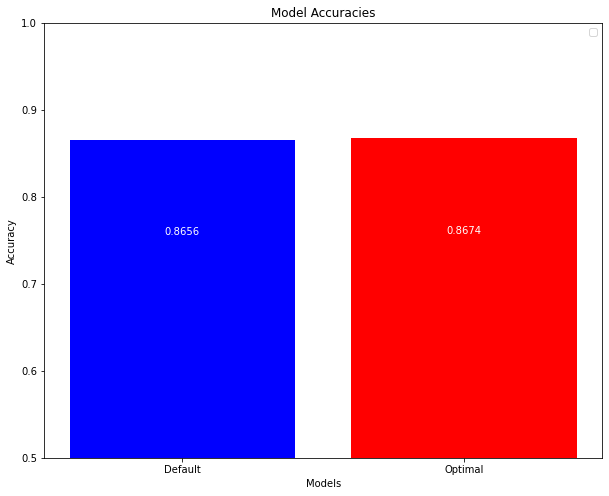

In [33]:
default_accuracy = 0.8656
hyper_accuracy = 0.8674
model_names = ['Default', 'Optimal']
accuracies = [default_accuracy, hyper_accuracy]

# Create the bar chart
plt.figure(figsize=(10, 8))
bars = plt.bar(model_names, accuracies, color=['blue', 'red'])

plt.ylim(0.5, 1)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.1, f'{yval:.4f}', ha='center', va='top', color='white')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()